In [162]:
# install.packages("gridExtra")


In [163]:
# install.packages("GGally")


In [164]:
# install.packages("ggplot2")



In [165]:
library(gridExtra)


In [166]:
data <- read.csv("/content/diabetes_dataset.csv")
print(head(data))


  Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
1           6     148            72            35       0 33.6
2           1      85            66            29       0 26.6
3           8     183            64             0       0 23.3
4           1      89            66            23      94 28.1
5           0     137            40            35     168 43.1
6           5     116            74             0       0 25.6
  DiabetesPedigreeFunction Age Outcome
1                    0.627  50       1
2                    0.351  31       0
3                    0.672  32       1
4                    0.167  21       0
5                    2.288  33       1
6                    0.201  30       0




---



# Data Preprocessing

In [167]:
# display the first 20 rows
print(head(data, n=20))

   Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
1            6     148            72            35       0 33.6
2            1      85            66            29       0 26.6
3            8     183            64             0       0 23.3
4            1      89            66            23      94 28.1
5            0     137            40            35     168 43.1
6            5     116            74             0       0 25.6
7            3      78            50            32      88 31.0
8           10     115             0             0       0 35.3
9            2     197            70            45     543 30.5
10           8     125            96             0       0  0.0
11           4     110            92             0       0 37.6
12          10     168            74             0       0 38.0
13          10     139            80             0       0 27.1
14           1     189            60            23     846 30.1
15           5     166            72    

In [168]:
# display the dimensions of the dataset
print(dim(data))

[1] 768   9


In [169]:
# list types for each attribute
print(sapply(data,class))

             Pregnancies                  Glucose            BloodPressure 
               "integer"                "integer"                "integer" 
           SkinThickness                  Insulin                      BMI 
               "integer"                "integer"                "numeric" 
DiabetesPedigreeFunction                      Age                  Outcome 
               "numeric"                "integer"                "integer" 


In [170]:
# Check missing values in each column
mulls <- colSums(is.na(data))
print(mulls)

             Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0 


In [171]:
duplicates <- duplicated(data)

# Count the number of duplicate rows
number_of_duplicates <- sum(duplicates)
print(number_of_duplicates)

[1] 0


In [172]:
# summarize the dataset
print(summary(data))

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [173]:
# Loop through each column of the dataset and print unique values
for (column_name in colnames(data)) {
  cat("\nUnique values in", column_name, ":\n")
  print(unique(data[[column_name]]))
}



Unique values in Pregnancies :
 [1]  6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14

Unique values in Glucose :
  [1] 148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 [19] 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 [37] 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
 [55]  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 [73] 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 [91] 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
[109] 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
[127] 198 121  67 174 199  56 169 149  65 190

Unique values in BloodPressure :
 [1]  72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76  82
[20]  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52  98 104
[39]  95  46 102 100  61  24  38 106 114

Unique values in SkinThickness :
 [1] 35 29  0 23 32 4

## Checking for Unlogical Values in the Dataset


In [174]:
# Count the number of zero values in the Glucose column
zero_number <- sum(data$Glucose == 0)
print(paste("Number of zero values in Glucose column:", zero_number))
zero_rows <- which(data$Glucose == 0)
# Print the row numbers
print(zero_rows)

[1] "Number of zero values in Glucose column: 5"
[1]  76 183 343 350 503


In [175]:
# Count the number of zero values in the BloodPressure column
zero_number <- sum(data$BloodPressure == 0)
print(paste("Number of zero values in BloodPressure column:", zero_number))
zero_rows <- which(data$BloodPressure == 0)
# Print the row numbers
print(zero_rows)

[1] "Number of zero values in BloodPressure column: 35"
 [1]   8  16  50  61  79  82 173 194 223 262 267 270 301 333 337 348 358 427 431
[20] 436 454 469 485 495 523 534 536 590 602 605 620 644 698 704 707


In [176]:
# Count the number of rows where BloodPressure is less than 40
low_blood_pressure_number <- sum(data$BloodPressure < 40)

# Print the result
print(paste("Number of rows with BloodPressure less than 40:", low_blood_pressure_number))



[1] "Number of rows with BloodPressure less than 40: 39"


In [177]:
# Count the number of zero values in the SkinThickness column
zero_number <- sum(data$SkinThickness == 0)
print(paste("Number of zero values in SkinThickness column:", zero_number))

[1] "Number of zero values in SkinThickness column: 227"


In [178]:
# Count the number of rows where SkinThickness is greater than 60
high_SkinThickness_number <- sum(data$SkinThickness > 60)

# Print the result
print(paste("Number of rows with SkinThickness  greater than 60:", high_SkinThickness_number))



[1] "Number of rows with SkinThickness  greater than 60: 2"


In [179]:
# Count the number of rows where BMI is greater than 50
high_BMI_number <- sum(data$BMI > 50)

# Print the result
print(paste("Number of rows with BMI  greater than 50:", high_SkinThickness_number))



[1] "Number of rows with BMI  greater than 50: 2"


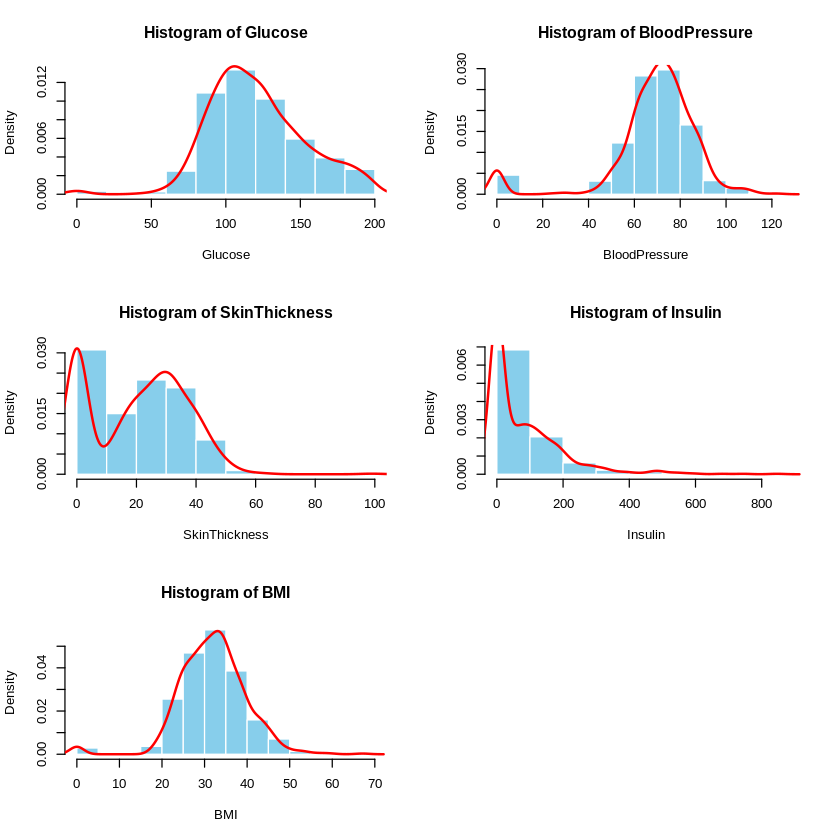

In [180]:
# List of columns to plot
columns_to_plot <- c( "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI")

# Plot histograms
par(mfrow = c(3, 2))
for (col in columns_to_plot) {
  hist(data[[col]], main = paste("Histogram of", col),
       xlab = col, col = "skyblue", border = "white", prob = TRUE)
  lines(density(data[[col]], na.rm = TRUE), col = "red", lwd = 2)
}
par(mfrow = c(1, 1))


## Handling Zero Values in the Dataset

As zero values indicate invalid data  so to address this issue, we replace zero values with either the mean or the median of column, based on the skewness of the data distribution.

### Approach:

1. **Mean**:
   - Used for columns with low skewness distribution ( Glucose, BloodPressure, and BMI)

2. **Median**:
   - Used for columns with highly skewed distribution to reduce the impact of outliers (SkinThickness and Insulin)

In [181]:
# Replace zero values in each column with mean or median

data$Glucose[data$Glucose == 0] <- mean(data$Glucose[data$Glucose != 0], na.rm = TRUE)
data$BloodPressure[data$BloodPressure == 0] <- mean(data$BloodPressure[data$BloodPressure != 0], na.rm = TRUE)
data$BMI[data$BMI == 0] <- mean(data$BMI[data$BMI != 0], na.rm = TRUE)
data$SkinThickness[data$SkinThickness == 0] <- median(data$SkinThickness[data$SkinThickness != 0], na.rm = TRUE)
data$Insulin[data$Insulin == 0] <- median(data$Insulin[data$Insulin != 0], na.rm = TRUE)

# Exploratory Analysis

In [182]:
library(ggplot2)


# 1-The average glucose levels among patients with and without diabetes.


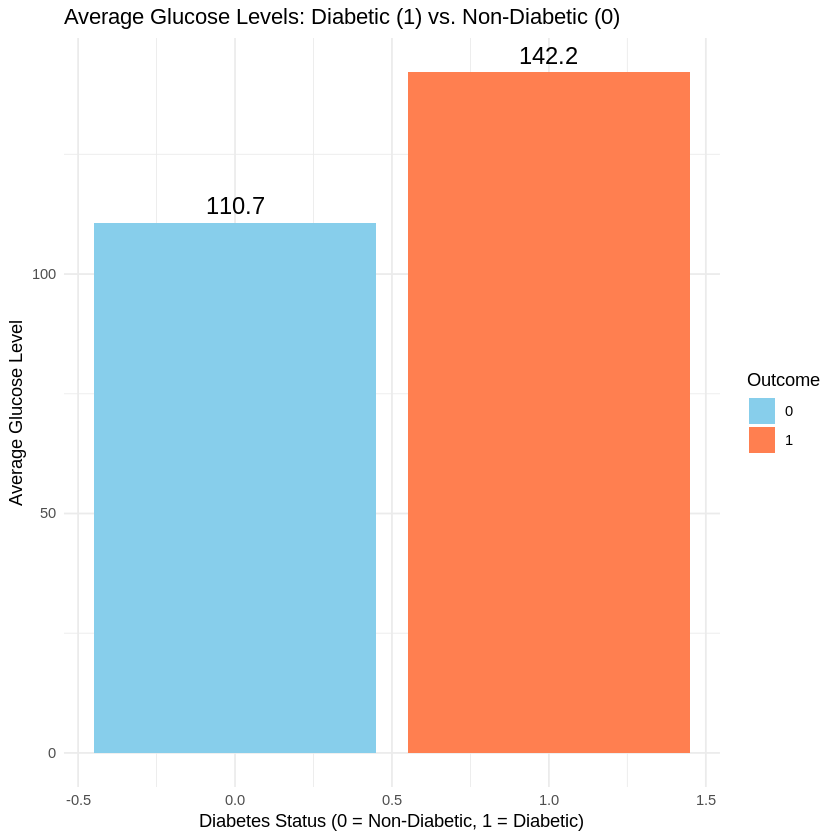

In [183]:
# Calculate average glucose levels for diabetic (1) and non-diabetic (0) patients
avg_glucose <- aggregate(Glucose ~ Outcome, data = data, FUN = mean)

# Create the base ggplot object
base2 <- ggplot(avg_glucose, aes(x = Outcome, y = Glucose))

# Create the bar chart with color
base2 +
  geom_bar(stat = "identity", aes(fill = as.factor(Outcome))) +
  geom_text(aes(label = round(Glucose, 1)), vjust = -0.5, size = 5) +
  labs(
    title = "Average Glucose Levels: Diabetic (1) vs. Non-Diabetic (0)",
    x = "Diabetes Status (0 = Non-Diabetic, 1 = Diabetic)",
    y = "Average Glucose Level",
    fill = "Outcome"
  ) +
  scale_fill_manual(values = c("0" = "skyblue", "1" = "coral")) +
  theme_minimal()


The bar chart shows the average glucose levels between those with and without diabetes. Diabetics have an average glucose level of 142.2, while non-diabetics have an average glucose level of 110.7.

# 2-The average age of patients with and without diabetes.

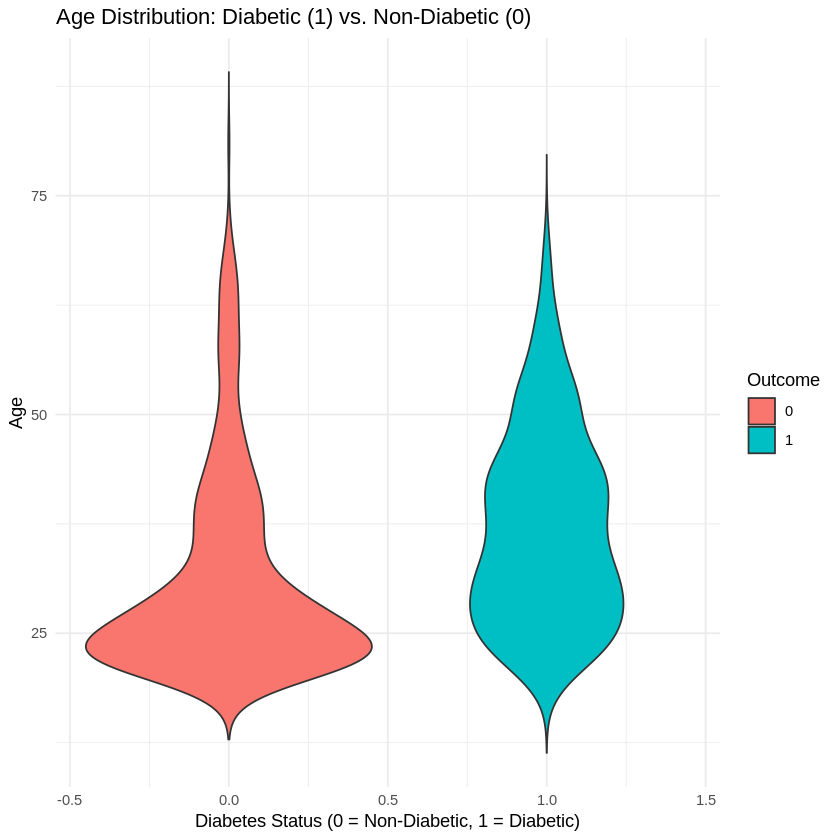

In [184]:
ggplot(data, aes(x = Outcome, y = Age, fill = factor(Outcome))) +
  geom_violin(trim = FALSE) +  # Create the violin plot
  labs(
    title = "Age Distribution: Diabetic (1) vs. Non-Diabetic (0)",
    x = "Diabetes Status (0 = Non-Diabetic, 1 = Diabetic)",
    y = "Age",
    fill = "Outcome"
  ) +
  theme_minimal()


The violin plots show the different age distributions of diabetic and non-diabetic individuals. the non-diabetics show a tendency toward younger ages, with most individuals found around the mid-30s and  the distribution curve of diabetics is much more spread out around the mid-50s to early 60s. Such a distribution indicate to diabetes being centralized toward older people.

# 3-The average blood pressure measurements across diabetic and non-diabetic groups.

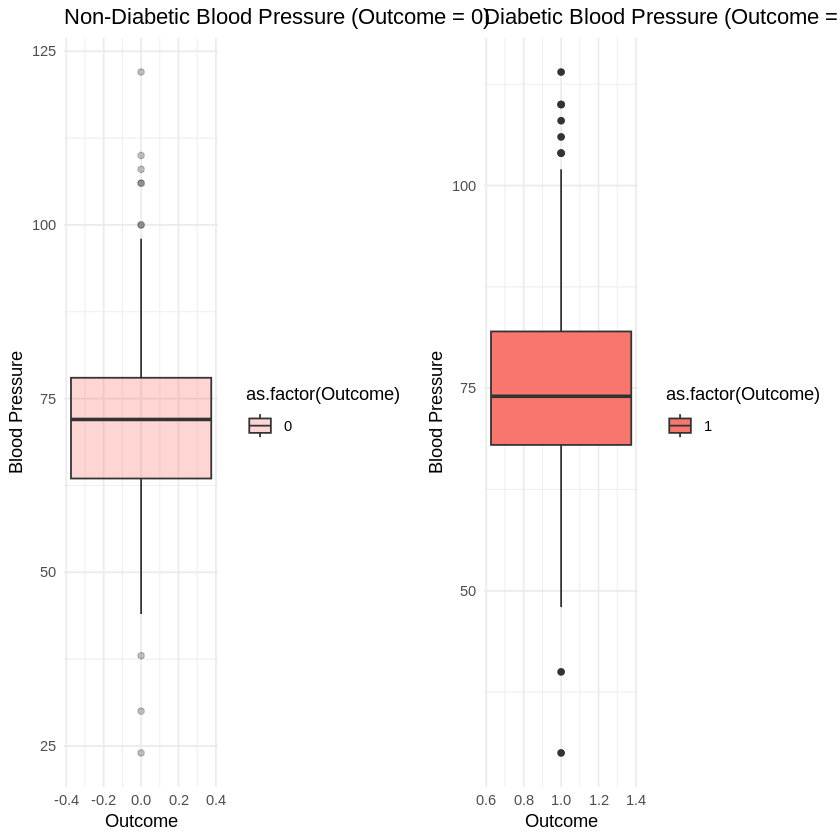

In [185]:
# Calculate the average blood pressure for Non-Diabetic and Diabetic groups
avg_blood_pressure <- aggregate(BloodPressure ~ Outcome, data = data, FUN = mean)

# Non-Diabetic Plot (Outcome = 0)
plot_non_diabetic <- ggplot(subset(data, Outcome == 0), aes(x = Outcome, y = BloodPressure, fill = as.factor(Outcome))) +
  geom_boxplot(alpha = 0.3) +
  labs(
    title = "Non-Diabetic Blood Pressure (Outcome = 0)",
    x = "Outcome",
    y = "Blood Pressure"
  ) +
  theme_minimal()

# Diabetic Plot (Outcome = 1)
plot_diabetic <- ggplot(subset(data, Outcome == 1), aes(x = Outcome, y = BloodPressure, fill = as.factor(Outcome))) +
  geom_boxplot() +
  labs(
    title = "Diabetic Blood Pressure (Outcome = 1)",
    x = "Outcome",
    y = "Blood Pressure"
  ) +
  theme_minimal()

# Arrange the two plots side by side
grid.arrange(plot_non_diabetic, plot_diabetic, ncol = 2)


The box plots clearly show blood pressure variations between diabetic and non-diabetic patients.

Non-Diabetic Patients: The blood pressure distribution of non-diabetic individuals is normal, containing a median value around 70.

Diabetic Patients: The blood pressure is more spread out and tends to have a higher median. According to box plot data, it appears that a majority of the diabetic people have higher pressure readings.

In [186]:
library(dplyr)


#4-The rate of diabetes among patients in the dataset.

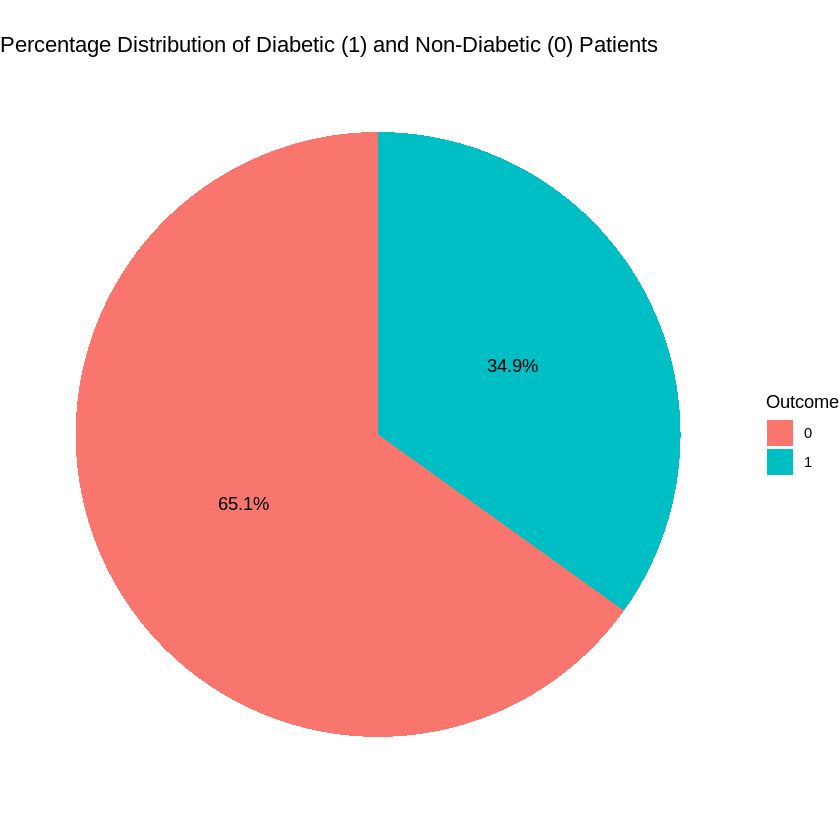

In [187]:
# Create the pie chart data
pie_data <- data %>%
  group_by(Outcome) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count / sum(Count) * 100, 1))

# Create the pie chart
pie_chart <- ggplot(pie_data, aes(x = "", y = Percentage, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity") +
  coord_polar("y") +
  theme_void() +
  labs(
    title = "Percentage Distribution of Diabetic (1) and Non-Diabetic (0) Patients",
    fill = "Outcome"
  ) +
  geom_text(aes(label = paste0(Percentage, "%")),
            position = position_stack(vjust = 0.5)
            )

pie_chart


The pie chart shows that 65.1% patients have no diabetes, while about 34.9% are known to have a diabetes diagnosis. This visualization focuses on showing the relative spread of diabetes in the study population.

# 5-The average BMI of diabetic versus non-diabetic patients.

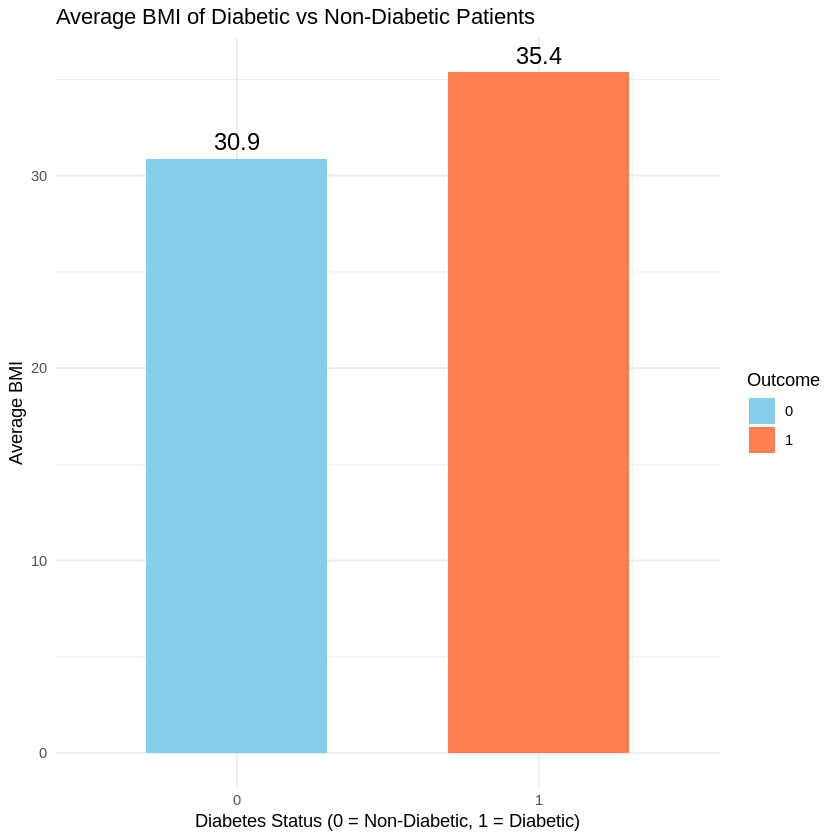

In [188]:
# Calculate the average BMI for Diabetic and Non-Diabetic patients
avg_bmi <- aggregate(BMI ~ Outcome, data = data, FUN = mean)

# Create the base ggplot object
base_bmi <- ggplot(avg_bmi, aes(x = as.factor(Outcome), y = BMI, fill = as.factor(Outcome)))

# Create the bar chart
base_bmi +
  geom_bar(stat = "identity", width = 0.6) +
  geom_text(aes(label = round(BMI, 1)), vjust = -0.5, size = 5) +

  labs(
    title = "Average BMI of Diabetic vs Non-Diabetic Patients",
    x = "Diabetes Status (0 = Non-Diabetic, 1 = Diabetic)",
    y = "Average BMI",
    fill = "Outcome"
  ) +
  scale_fill_manual(values = c("0" = "skyblue", "1" = "coral")) +
  theme_minimal()


 The bar chart  shows that average BMI exhibits a significant difference between diabetic and non-diabetic patients. The average BMIs of diabetic patients  is relatively higher (35.4) compared to  non-diabetes, who have an average of 30.9 . This observation shows   association between obesity and increased risk diabetes.

# 6-The distribution of BMI values among all patients.

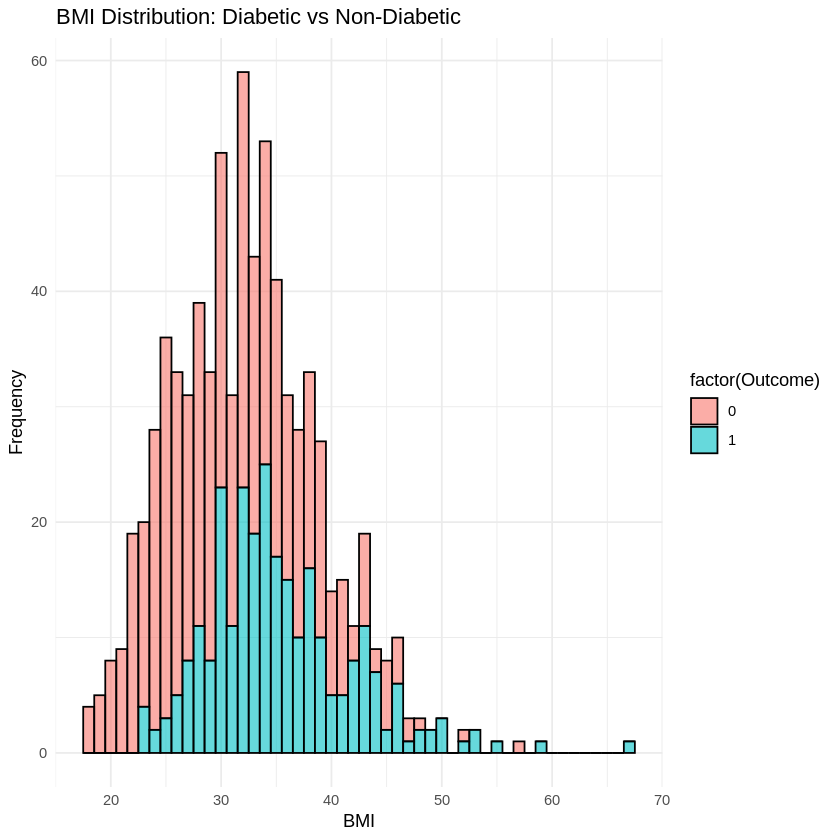

In [189]:
# Create the base ggplot object
base_bmi <- ggplot(data, aes(x = BMI))

# Plot histogram showing BMI distribution with Outcome as fill
base_bmi +
  geom_histogram(aes(fill = factor(Outcome)), binwidth = 1, color = "black", alpha = 0.6) +
  labs(
    title = "BMI Distribution: Diabetic vs Non-Diabetic",
    x = "BMI",
    y = "Frequency"
  ) +
  theme_minimal()


The histogram shows the distribution of BMI in diabetic and non-diabetic patients.
Non-diabetic appear to have an almost normal distribution of BMI where it  around 25-30. This infers that a good number of healthy non-diabetic individuals are expected to fall under a healthy range of BMI and for diabetics shows a rightward shift where it  around 30-35.  this also confirms the known relationship between obesity and the increased risk of  diabetes.


# 7-The distribution of Diabetes Pedigree Function (DPF) values for diabetic and non-diabetic patients.


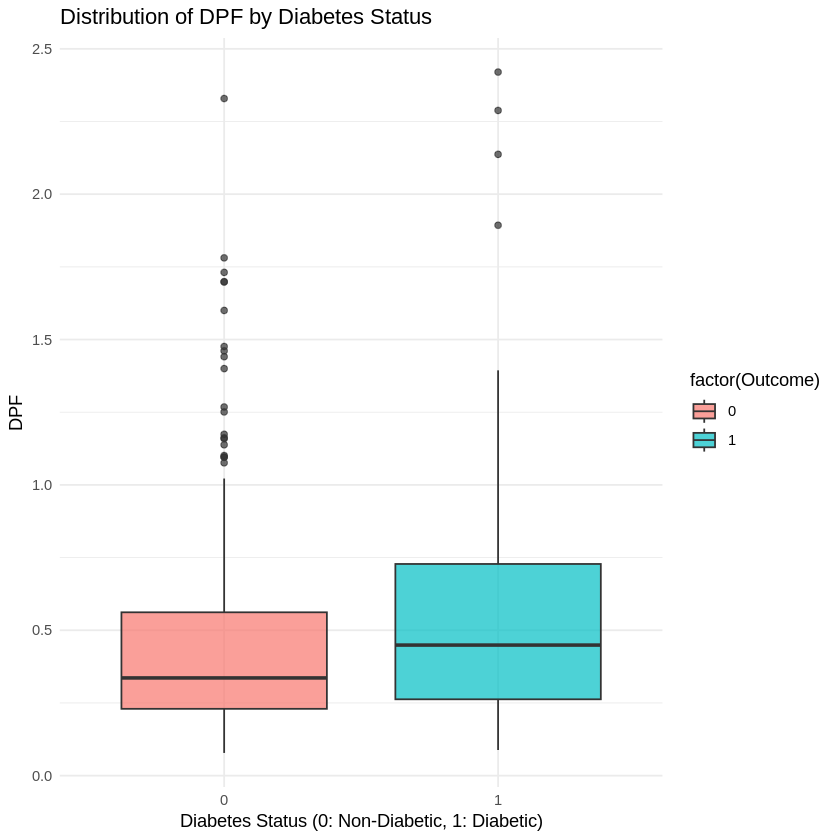

In [190]:
# Box Plot for Diabetes Pedigree Function using 0 and 1
box_plot <- ggplot(data, aes(x = factor(Outcome), y = DiabetesPedigreeFunction, fill = factor(Outcome))) +
  geom_boxplot(alpha = 0.7) +
  labs(
    title = "Distribution of DPF by Diabetes Status",
    x = "Diabetes Status (0: Non-Diabetic, 1: Diabetic)",
    y = "DPF"
  ) +
  theme_minimal()
box_plot

The boxplot shows the values of the diabetes pedigree function (DPF) for both diabetic and non-diabetic individuals.

 DPF values for non-diabetic individuals are typically lower, closely at a range that is narrow indicates a median DPF at almost 0.4 .

The DPF values for diabetics in contrast are more dispersed, but the diabetics have a higher median than non-diabetics a median DPF value around 0.7.

# 8-The relationship between the number of pregnancies and diabetes occurrence.

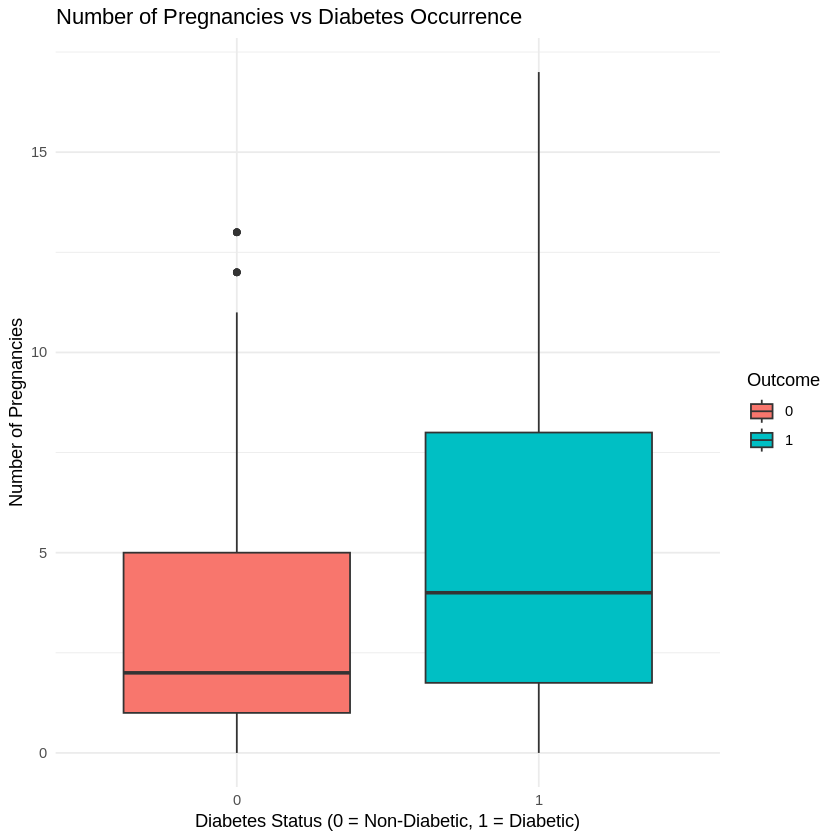

In [191]:
# Create the boxplot for the number of pregnancies vs diabetes
ggplot(data, aes(x = as.factor(Outcome), y = Pregnancies, fill = as.factor(Outcome))) +
  geom_boxplot() +
  labs(
    title = "Number of Pregnancies vs Diabetes Occurrence",
    x = "Diabetes Status (0 = Non-Diabetic, 1 = Diabetic)",
    y = "Number of Pregnancies",
    fill = "Outcome"
  ) +
  theme_minimal()


The box plot shows a range of distributed numbers of pregnancies for both diabetic patients and non diabetic .

Non-Diabetic Patients : There are lots of non-diabetic women who usually have few pregnancies, where the median is around 3. shows that the number of pregnancies is less variable among non-diabetic women.

Diabetic Patients : The distribution of the number of pregnancies for diabetic women is  wider with a higher median as compared to that of non-diabetics. it has a median around 5 signifying more variability for the number of pregnancies among diabetic women.

In [192]:
library(GGally)


# 9-The correlation between glucose levels and BMI.

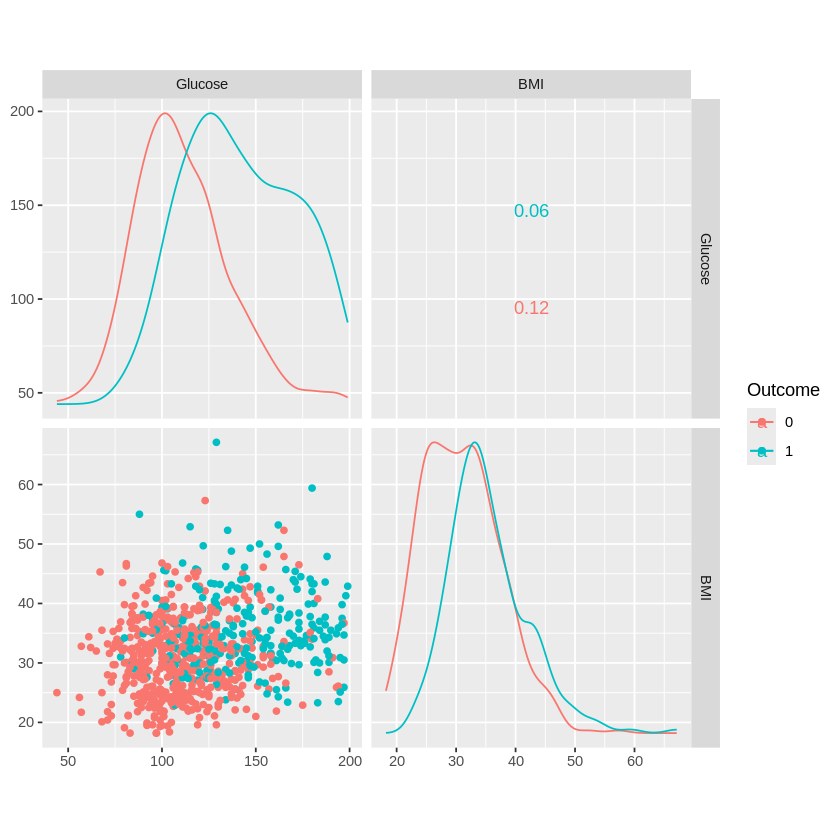

In [193]:
ggscatmat(data, columns = c("Glucose", "BMI"), color = "Outcome")



The scatterplot matrix shows potential relationships between glucose levels, BMI.
There appears to be a weak positive correlation between glucose levels and BMI. This suggests that as BMI increases, glucose levels tend to rise as well.


# 10-The trend of glucose levels with age among diabetic and non-diabetic patients.


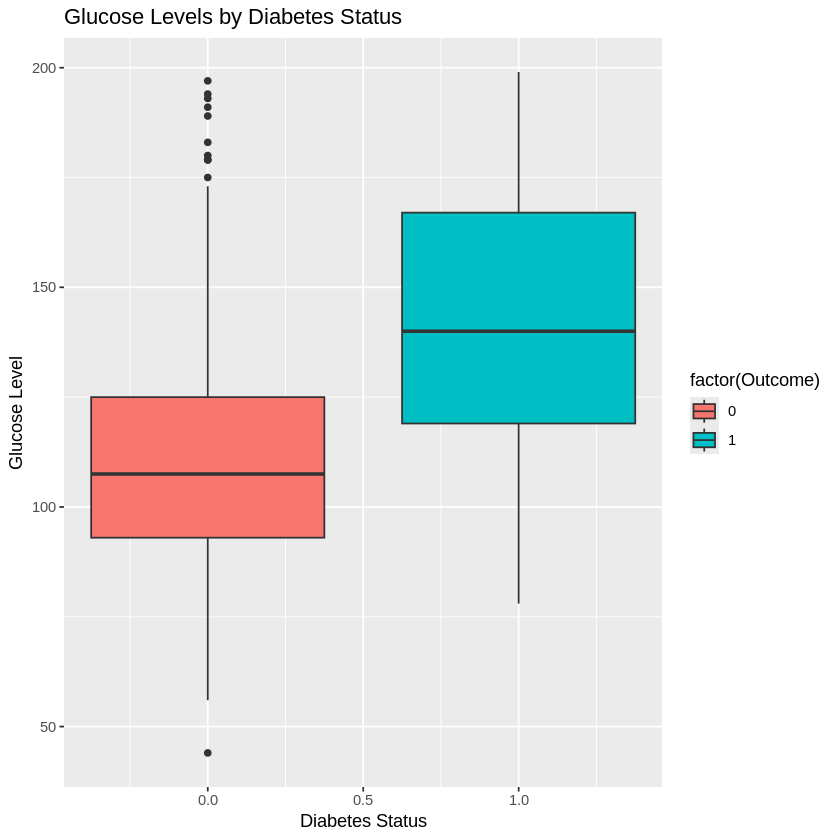

In [194]:
ggplot(data, aes(x = Outcome, y = Glucose, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "Glucose Levels by Diabetes Status", x = "Diabetes Status", y = "Glucose Level")


The box plot shows a significant difference in glucose levels between diabetic and non-diabetic patients.

Non-Diabetic Patients :The median glucose level for non-diabetics appears to be around 100 mg/dL

Diabetic Patients: The median glucose level for diabetics is higher, around 150 mg/dL.



---




# **PART 2: Answering Questions**

**1.Are higher glucose levels associated with a greater likelihood of diabetes?**

In [195]:
library(ggplot2)

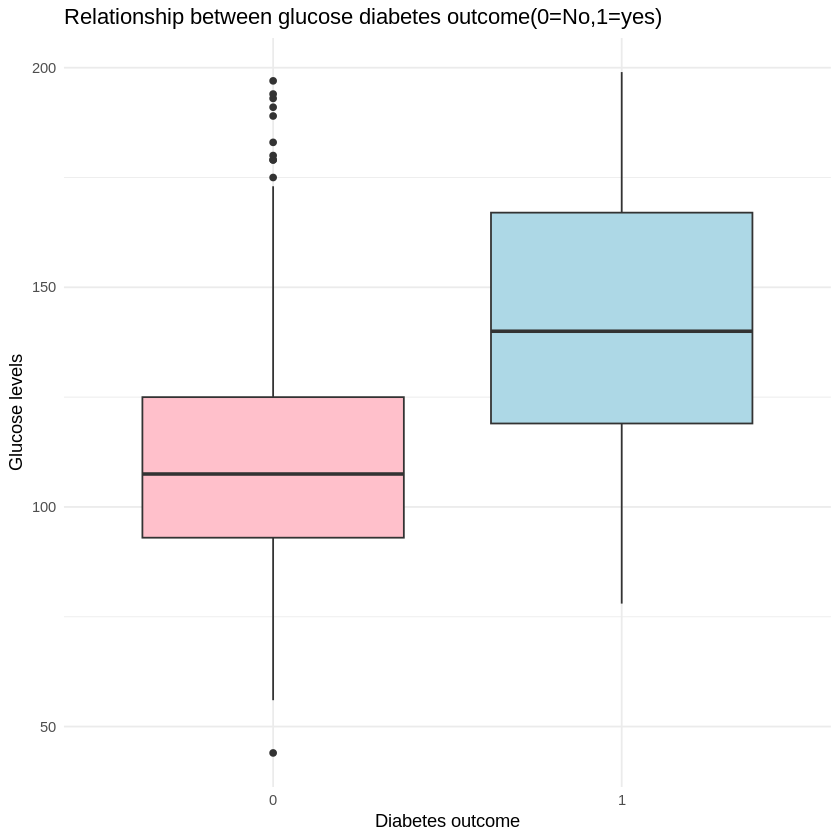

In [196]:
#Analysis Relationship between glucose diabetes outcome by plotting distribution of glucose by diabetes outcome
ggplot(data,aes(x=factor(Outcome),y=Glucose))+
  geom_boxplot(fill=c("pink","lightblue"))+
  labs(title="Relationship between glucose diabetes outcome(0=No,1=yes) ",x="Diabetes outcome",y="Glucose levels")+
  theme_minimal()

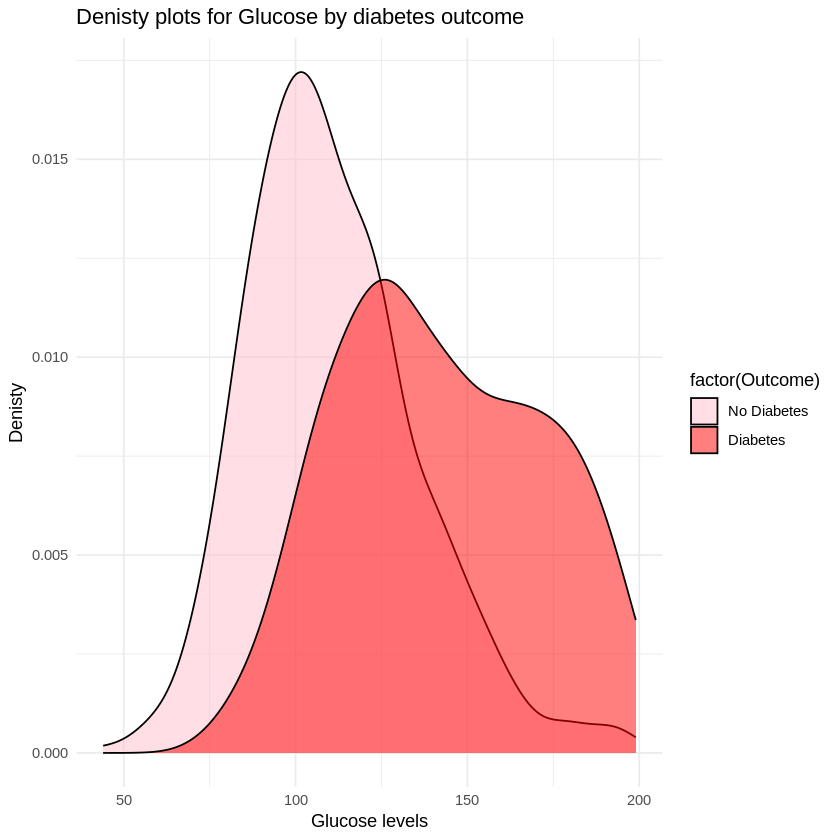

In [197]:
#Denisty plots for Glucose values by outcome
ggplot(data,aes(x=Glucose,fill=factor(Outcome)))+
  geom_density(alpha=0.5)+
  labs(title="Denisty plots for Glucose by diabetes outcome",x="Glucose levels",y="Denisty")+
  scale_fill_manual(values = c("pink","red"),labels=c("No Diabetes","Diabetes"))+
  theme_minimal()

In [198]:
#find correlation between glucose levels and diabetes outcome
cor.test(data$Glucose,data$Outcome)


	Pearson's product-moment correlation

data:  data$Glucose and data$Outcome
t = 15.68, df = 766, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4374376 0.5446780
sample estimates:
      cor 
0.4929277 


**Answer for Question 1**



1. The results from boxplot :

* showing that diabetics had a significantly higher glucose level than non-diabetic patients, as well as the IQR of the diabetic group was clearly high, indicating that most glucose measurements were very high in diabetics.


2.  The results from Denisty plot:

*  The density curve of diabetic patients is concentrated at a higher glucose level than those without diabetes and the overlap between the two distributions is strong evidence that glucose level is an important factor in distinguishing diabetics from non-diabetics.


3. The correlation between glucose and outcome is about 0.4665814, which indicates a relationship between high blood glucose level and the presence of diabetes













---



**2.	Are patients with high glucose concentrations also likely to have higher BMI values?:**

In [199]:
#find correlation between glucose levels and patient's BMI
cor.test(data$Glucose,data$BMI)


	Pearson's product-moment correlation

data:  data$Glucose and data$BMI
t = 6.5693, df = 766, p-value = 9.334e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1628577 0.2968359
sample estimates:
      cor 
0.2309412 


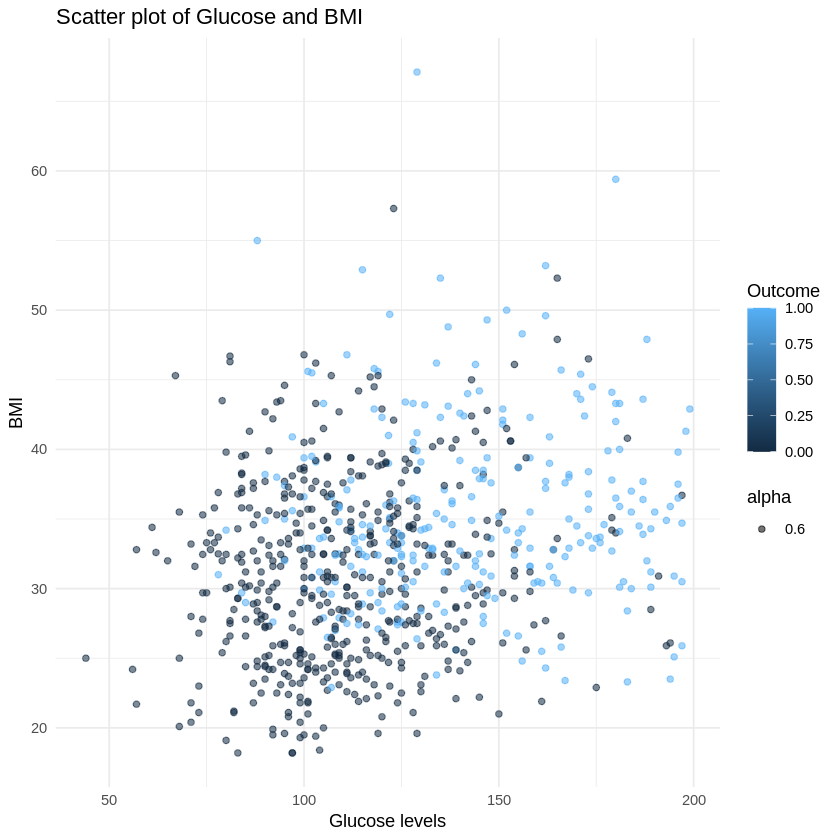

In [200]:
#Analysis Relationship between Glucose levels and BMI using scatter plot
ggplot(data,aes(x=Glucose,y=BMI))+
  geom_point(aes(color=Outcome,alpha=0.6))+
  labs(title="Scatter plot of Glucose and BMI",x="Glucose levels",y="BMI")+
  theme_minimal()

In [201]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [202]:
library(corrplot)

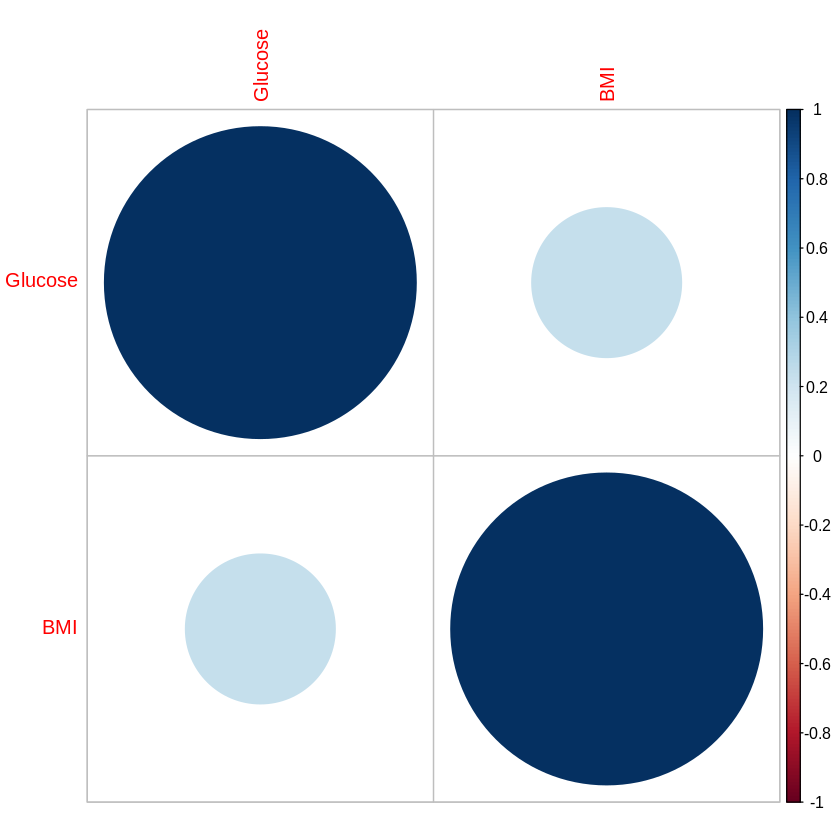

In [203]:
##Analysis Relationship between Glucose levels and BMI using correlation matrix
correlation_matrix<-cor(data[,c("Glucose","BMI")],use="complete.obs")
corrplot(correlation_matrix,method = "circle")

# **Answer for Question 2**



*  Depending on Pearson's product-moment correlation there is a weak positive correlation with glucose levels and BMI
*   Based on the scatter plot with the presence of the constant variable which is the level of glucose on the x-axis and the dependent variable for the independent variable on the y-axis there is a positive correlation between weight and glucose level as with increasing the level of glucose in the blood may increase weight.

*   Based on correlation matrix, the presence of blue circles indicates a positive correlation between weight and BMI and Glucose levels.
* **Although there is a relation, it is weak, so it must be analyzed based on other factors such as age or genetics in order to clarify the relationship better**






---



**3.	Are patients with a higher number of pregnancies at greater risk of developing diabetes?**

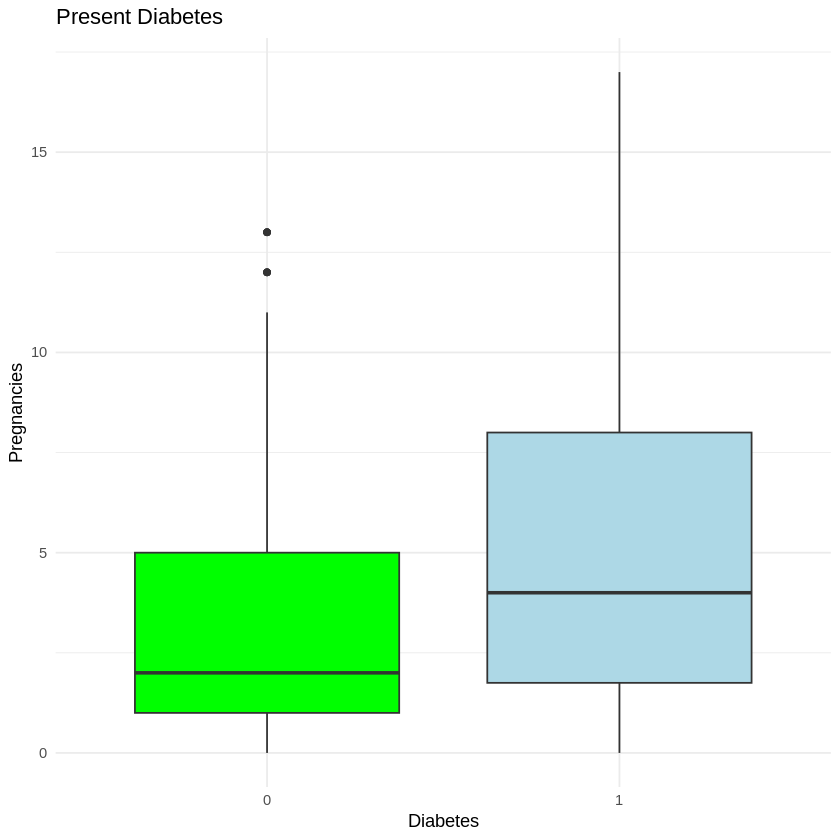

In [204]:
#Analysis Number Of Pregnancies Vs Diabetes Outcome
ggplot(data,aes(x=factor(Outcome),y=Pregnancies))+
  geom_boxplot(fill=c("green","lightblue"))+
  labs(title="Present Diabetes ",x="Diabetes",y="Pregnancies")+
  theme_minimal()

# **Answer for Question 3**



*  Box plot shows the relationship between the number of pregnancies and the presence of diabetes and the median number of pregnancies in patients with diabetes is higher compared to patients without diabetes
*  As well as IQR for people with diabetes is wider than those without diabetes, which indicates a greater disparity with increasing the number of pregnancies

*  So the results show that patients with diabetes tend to have a higher number of pregnancies and there is also a greater disparity in the number of pregnancies among patients with diabetes.





---



**4.	Are older patients more likely to have higher insulin concentrations and blood glucose levels?**

`geom_smooth()` using formula = 'y ~ x'


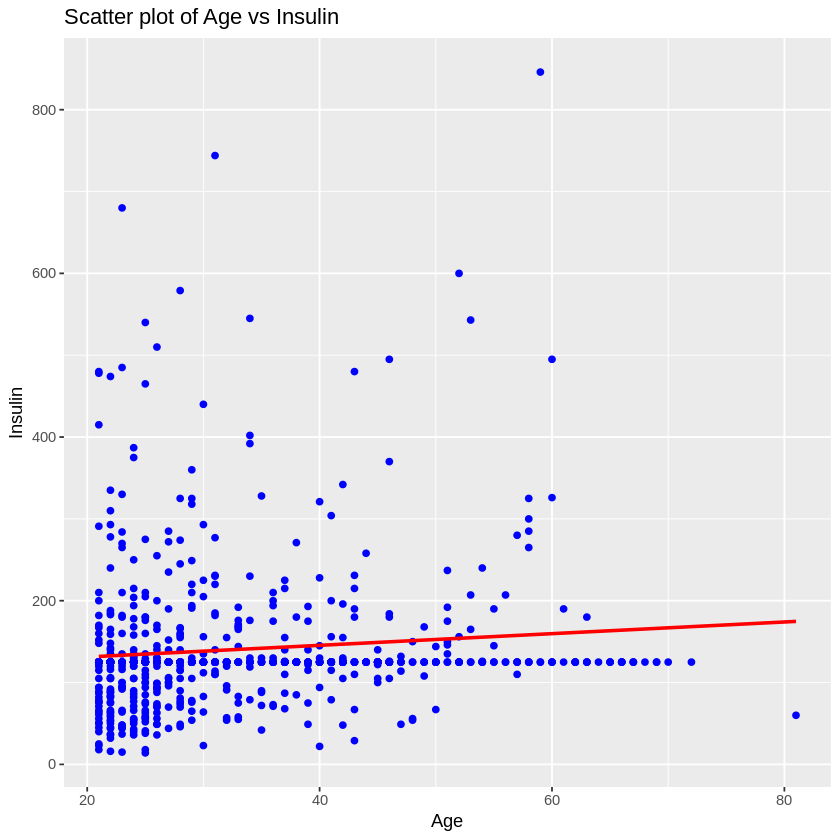

In [205]:
# Scatter plots to visualize the relationship between Age and Insulin, and Age and Glucose
# Scatter plot of Age vs Insulin
ggplot(data,aes(x=Age,y=Insulin))+
  geom_point(color='blue')+
  geom_smooth(method = 'lm', se = FALSE, color = 'red') +
  labs(title="Scatter plot of Age vs Insulin",x="Age",y="Insulin")

`geom_smooth()` using formula = 'y ~ x'


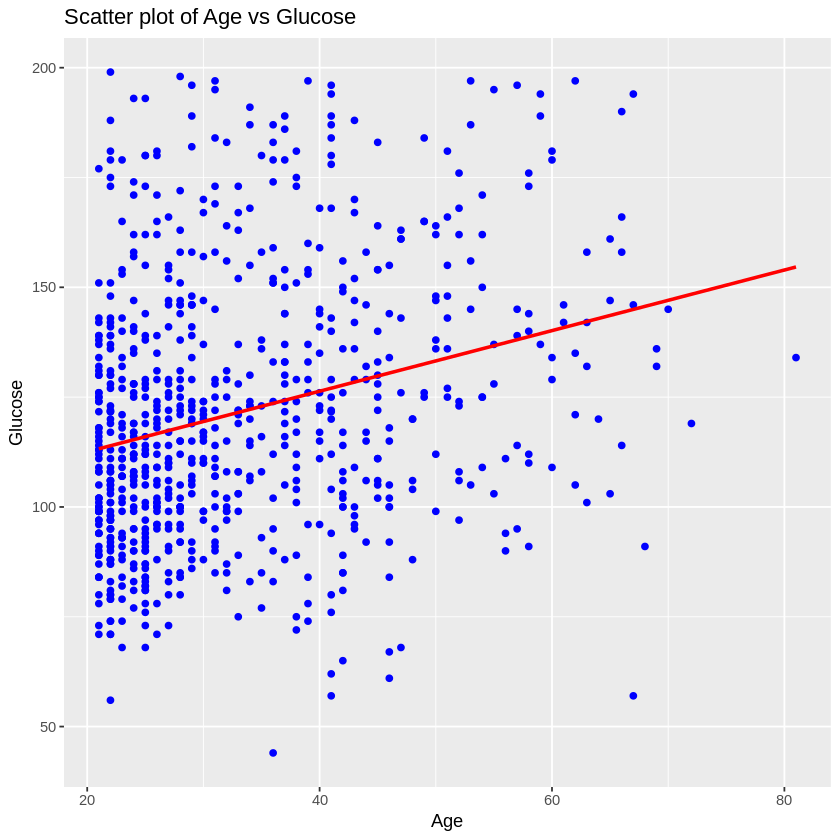

In [206]:
# Scatter plot of Age vs Glucose
ggplot(data,aes(x=Age,y=Glucose))+
  geom_point(color='blue')+
  geom_smooth(method = 'lm', se = FALSE, color = 'red') +
  labs(title="Scatter plot of Age vs Glucose",x="Age",y="Glucose")

In [207]:
# Correlation analysis between Age and Insulin
cor_age_insulin<-cor(data$Age,data$Insulin,use="complete.obs")
cat("correlation between Age and Insulin",cor_age_insulin,"\n")

correlation between Age and Insulin 0.09710125 


In [208]:
# Correlation analysis between Age and Glucose
cor_age_Glucose<-cor(data$Age,data$Glucose,use="complete.obs")
cat("correlation between Age and Glucose",cor_age_Glucose,"\n")

correlation between Age and Glucose 0.2665335 


# **Answer for Question 4**



*   A weak and negative relationship appears between insula levels and age, as the correlation coefficient is -0.04216295, which indicates that there is negative correlation between age and insulin levels.
*   While a positive relationship appears between age and glucose level, as the correlation coefficient is 0.2635143, and this indicates a weak positive relationship between them, which indicates the possibility of increasing blood glucose levels with age.


*   So older patients may have a higher glucose level, but age is not a major factor in blood insulin toxicity.






---



**5.	Can you identify common “risk profiles” for diabetic patients based on key metrics (glucose, BMI, age, etc.)?**

In [209]:
clean_data<-na.omit(data)

In [210]:
#Choose the main variable for cluster analysis
data_cluster<-clean_data[,c("Glucose","BMI","Age")]
set.seed(123)
kmeans_result<-kmeans(data_cluster,centers = 3)
#Add clusters to the data
clean_data$Cluster<-kmeans_result$cluster

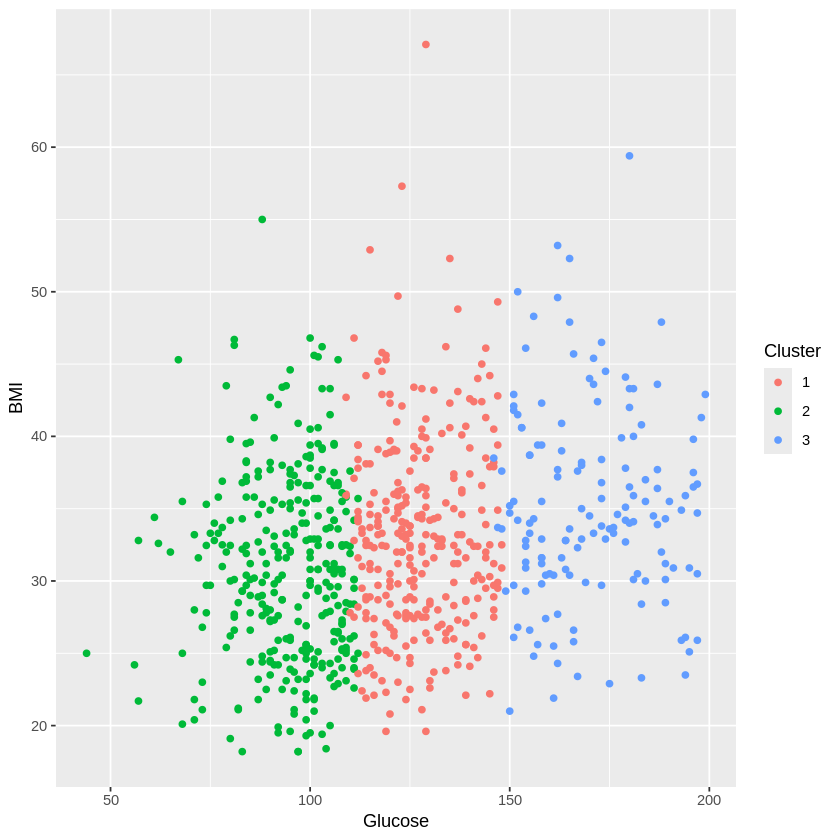

In [211]:
#plot the results of Clustering
ggplot(clean_data,aes(x=Glucose,y=BMI,color=as.factor(Cluster)))+
  geom_point()+
  labs("Clusrtring of patients based on Glucose and BMI",x="Glucose",y="BMI",color="Cluster")

# **Answer for Question 5**

Based on cluster analysis using the k-means algorithm to divide patients into three groups based on glucose and BMI level


*   The first group contains patients with low glucose levels as well as low BMI, and these patients have a risk of developing diabetes.
*   The second group contains patients with a medium glucose level and high BMI, and those have a moderate risk of diabetes.


*   The third group has a high glucose level as well as BMI, which is evidence that the profile of these patients is high in relation to the risk of diabetes.










---



# **Come up with 5 more bivariate/multivariate analysis questions and similarly answer each with appropriate visuals and commentary.**



---



**1.Is there a relationship between BMI and Age?**

`geom_smooth()` using formula = 'y ~ x'


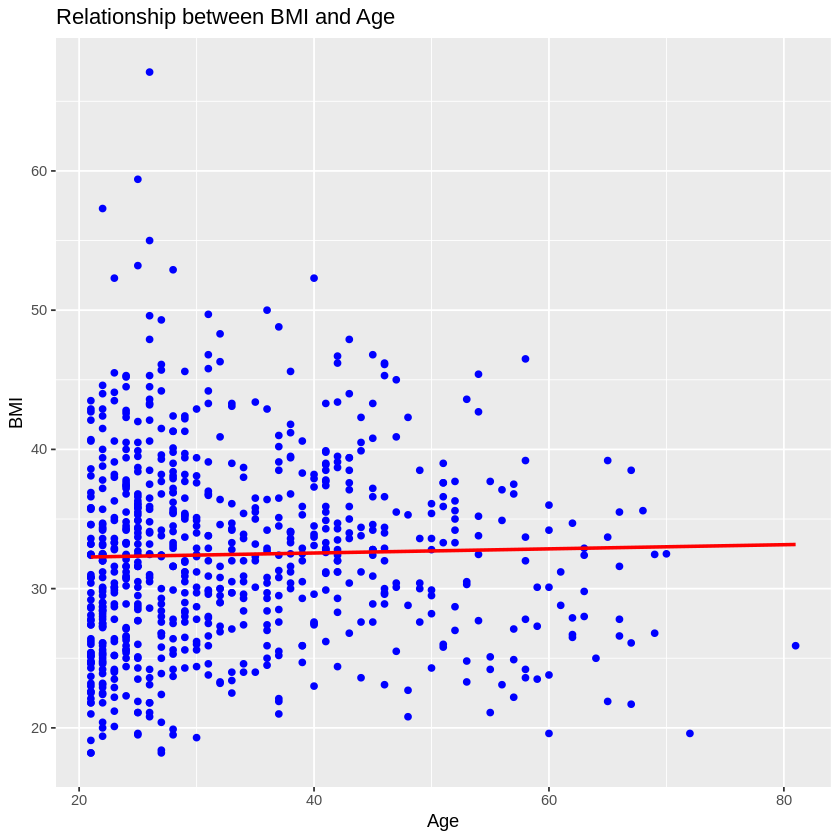

In [212]:
#Relationship between BMI and Age
ggplot(data,aes(x=Age,y=BMI))+
  geom_point(color='blue')+
  geom_smooth(method='lm',se = FALSE,color='red')+
  labs(title = "Relationship between BMI and Age",x='Age',y='BMI')

# **Answer 1**

*There is a weak relationship between age and BMI where increasing age may cause an increase in BMI, but this relationship is not strong enough to confirm that age is the main cause of the increase in BMI, as the red regression line indicates that the increase in BMI is slight with increasing age.*



---



** 2.Does a family history of diabetes pedigree function affect glucose levels?**

`geom_smooth()` using formula = 'y ~ x'


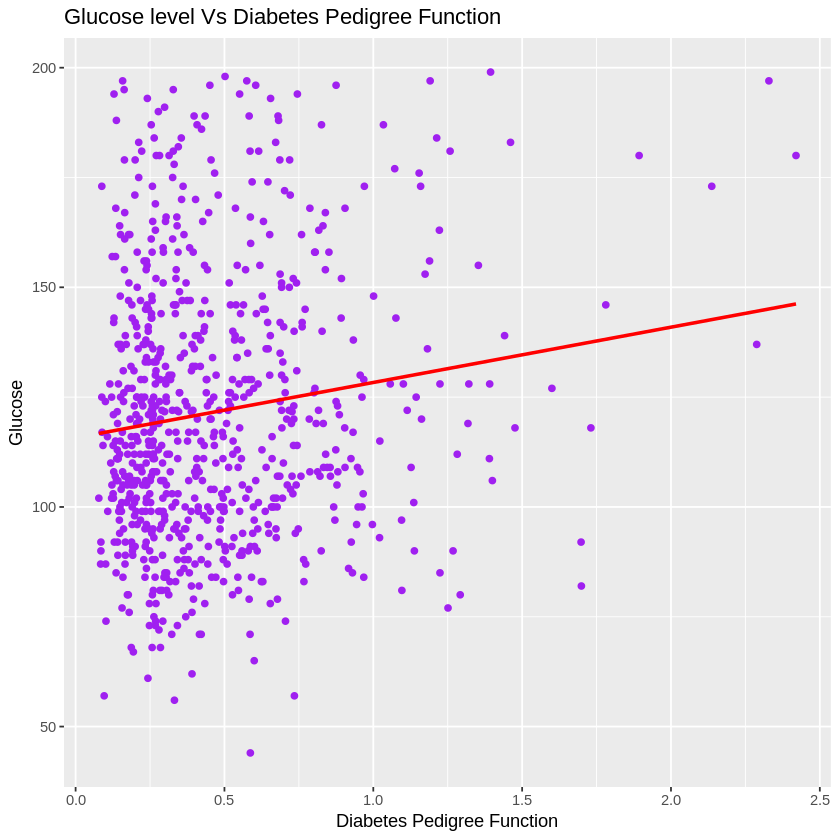

In [213]:
# Relation between Glucose level and Diabetes Pedigree Function
ggplot(data,aes(x=DiabetesPedigreeFunction,y=Glucose))+
  geom_point(color='purple')+
  geom_smooth(method='lm',se = FALSE,color='red')+
  labs(title = "Glucose level Vs Diabetes Pedigree Function ",x='Diabetes Pedigree Function',y='Glucose')

# **Answer 2**

**Family history can be a slight factor in glucose levels, and although there is an increase in glucose level, there is a wide spread around the red regression line, and this indicates that there are other factors influencing besides family history, so this relationship is relatively small.**



---



3.**Is there a relationship between insulin levels and blood pressure?**

`geom_smooth()` using formula = 'y ~ x'


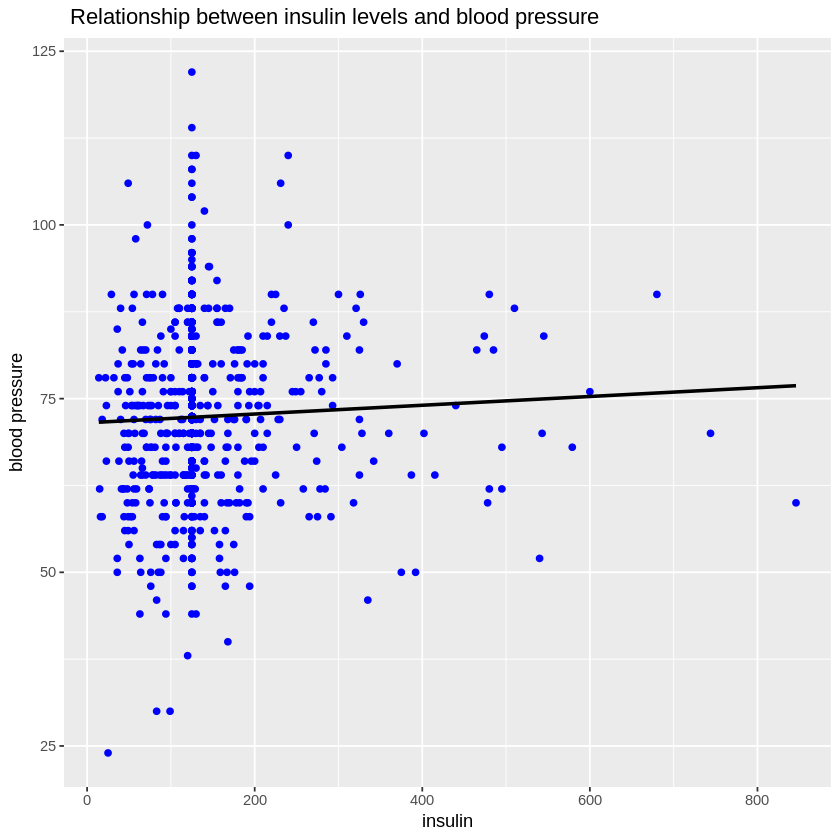

In [214]:
# Relationship between insulin levels and blood pressure
ggplot(data,aes(x=Insulin,y=BloodPressure))+
  geom_point(color='blue')+
  geom_smooth(method='lm',se = FALSE,color='black')+
  labs(title = " Relationship between insulin levels and blood pressure",x=' insulin ',y='blood pressure')

# **Answer 3**

*There is a slight positive relationship between the level of insulin and blood pressure, with the blood pressure tends to increase slightly.*



---



4.**Do diabetes risks differ across age groups when considering glucose levels and BMI**?

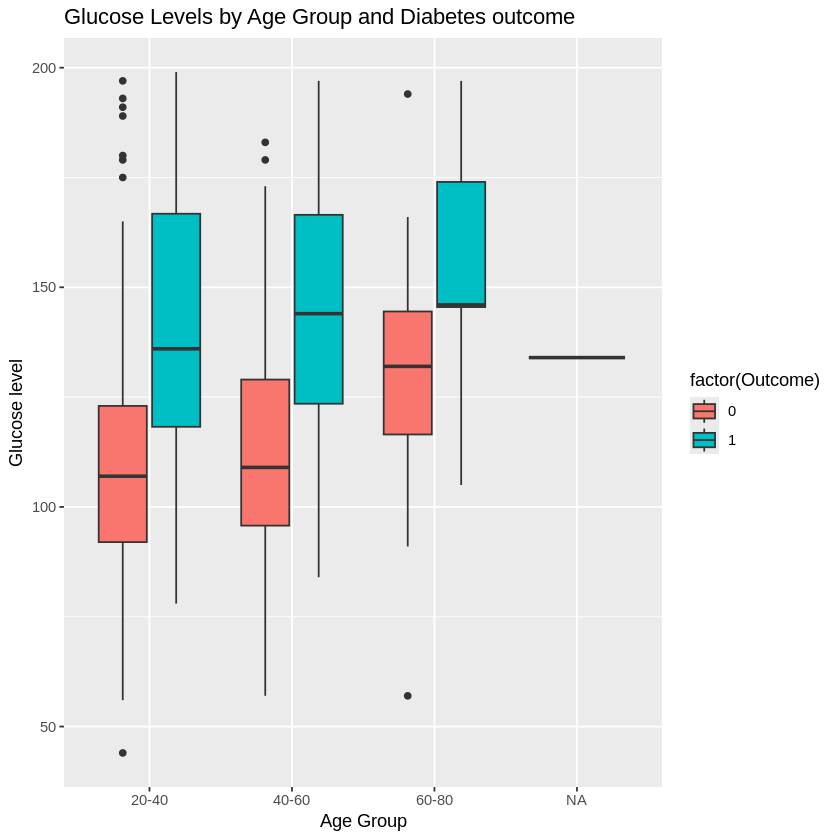

In [215]:
#Glucose Levels by Age Group and Diabetes Outcome
data$AgeGroup<-cut(data$Age,breaks = c(20,40,60,80),labels=c("20-40","40-60","60-80"))
ggplot(data,aes(x=AgeGroup,y=Glucose,fill=factor(Outcome)))+
  geom_boxplot()+
  labs(title="Glucose Levels by Age Group and Diabetes outcome",x="Age Group",y="Glucose level")

# **Answer 4**



*   In the group of 20-40 patients with diabetes have a high glucose level compared to non-diabetic patients.

*   In the 40-60 category, patients with diabetes still have a high glucose level compared to those without diabetes.

*   In the 60-80 category, patients with diabetes still have a high glucose level compared to those without diabetes, but distribution is becoming more prevalent.

**The prevalence of high glucose levels increases with age, particularly among individuals with diabetes. Therefore, age and diabetes are key factors in determining blood glucose levels.**




---



**5.Is there a relationship between blood pressure, insulin levels, and glucose levels?**

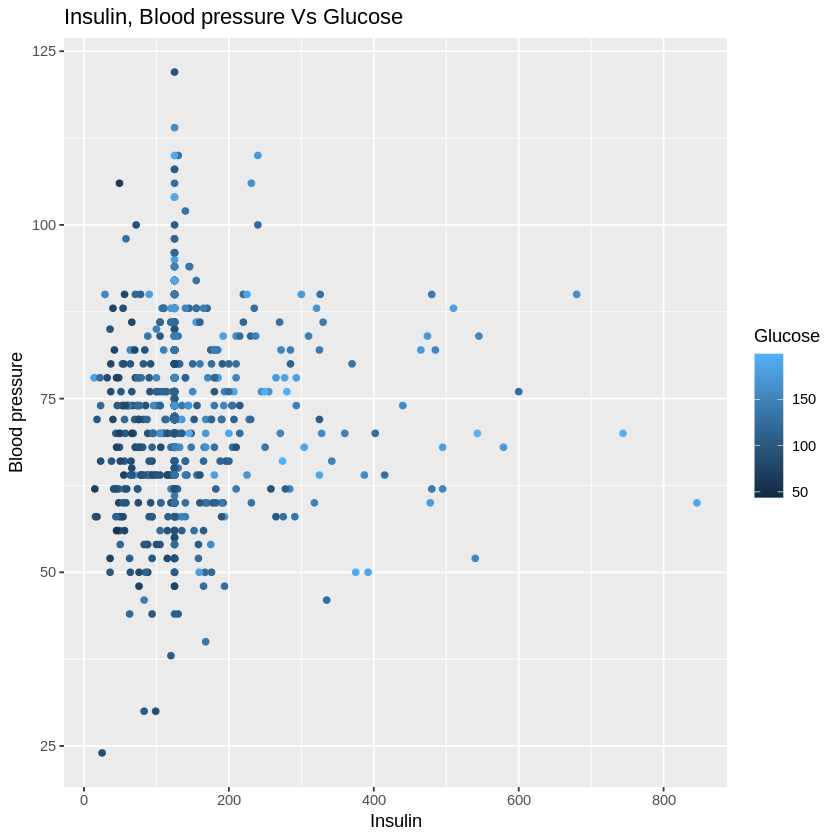

In [216]:
#relationship between blood pressure, insulin levels, and glucose levelس
ggplot(data,aes(x=Insulin,y=BloodPressure,color=Glucose))+
  geom_point()+
  labs(title="Insulin, Blood pressure Vs Glucose",x="Insulin",y="Blood pressure",color="Glucose")

# **Answer 5**

**High levels of glucose appear to be associated with a greater disparity between insulin and blood pressure, so glucose plays an important role in the diversity in blood pressure and insulin levels.**



---



# PART 3: Hypothesis Testing

##Claim: “There is a significant difference in glucose levels between diabetic and non-diabetic patients.”

Null Hypothesis (H0) : mean glucose level of diabetic == mean glucose level of non-diabetic





Alternatiive Hypothesis (Ha) : mean glucose level of diabetic != mean glucose level of non-diabetic


In [217]:
data$Outcome <- as.factor(data$Outcome)

In [218]:
diabetic_glucose <- data$Glucose[data$Outcome == "1"]
non_diabetic_glucose <- data$Glucose[data$Outcome == "0"]

In [219]:
t_test <- t.test(diabetic_glucose, non_diabetic_glucose, var.equal = FALSE)

In [220]:
cat("T-Test Statistic:", t_test$statistic, "\n")
cat("P-Value:", t_test$p.value, "\n")

T-Test Statistic: 14.86418 
P-Value: 3.099126e-41 


In [221]:
if (t_test$p.value < 0.05) {
  result <- "Reject H0: There is a significant difference in glucose levels between diabetic and non-diabetic patients."
} else {
  result <- "Fail to reject H0: There is no significant difference in glucose levels between diabetic and non-diabetic patients."
}

In [222]:
cat("Decision:", result, "\n")

Decision: Reject H0: There is a significant difference in glucose levels between diabetic and non-diabetic patients. 


Claim 2 My own claim is : "There is a significant difference in BMI levels between diabetic and non-diabetic patients."

Null Hypothesis (H0) : mean BMI level of diabetic == mean BMI of non-diabetic



Alternatiive Hypothesis (Ha) : mean BMI level of diabetic != mean BMI of non-diabetic

In [223]:
diabetic_bmi <- data$BMI[data$Outcome == "1"]
non_diabetic_bmi <- data$BMI[data$Outcome == "0"]

In [224]:
t_test_bmi <- t.test(diabetic_bmi, non_diabetic_bmi, var.equal = FALSE)

In [225]:
# Print test results
cat("T-Test Statistic (BMI):", t_test_bmi$statistic, "\n")
cat("P-Value (BMI):", t_test_bmi$p.value, "\n")

T-Test Statistic (BMI): 9.048582 
P-Value (BMI): 2.616867e-18 


In [226]:
if (t_test_bmi$p.value < 0.05) {
  result_bmi <- "Reject H0: There is a significant difference in BMI levels between diabetic and non-diabetic patients."
} else {
  result_bmi <- "Fail to reject H0: There is no significant difference in BMI levels between diabetic and non-diabetic patients."
}

In [227]:
cat("Decision (BMI):", result_bmi, "\n")

Decision (BMI): Reject H0: There is a significant difference in BMI levels between diabetic and non-diabetic patients. 


## Part 4: Confidence Interval Analysis

# In this part, we analyze the behavior of 95% confidence intervals (CIs) with varying sample sizes.

# 1. **4.1**: Take 25 random samples of size 15.
# 2. **4.2**: Increase the sample size to 100 and repeat the process.
# 3. **4.3**: Take 20 random samples of size 10.

# For each step:
# - Compute the mean and 95% CI for each sample.
# - Determine the proportion of CIs that include the true population mean.
# - Observe how sample size impacts CI width and accuracy.


In [228]:
set.seed(123)
selected_column <- data$Glucose

# function to compute confidence intervals
compute_ci <- function(sample_data, confidence_level = 0.95) {
  sample_mean <- mean(sample_data)
  sample_sd <- sd(sample_data)
  n <- length(sample_data)
  error_margin <- qt(confidence_level + (1 - confidence_level) / 2, df = n - 1) * (sample_sd / sqrt(n))
  lower_bound <- sample_mean - error_margin
  upper_bound <- sample_mean + error_margin
  return(c(lower_bound, upper_bound))
}

population_mean <- mean(selected_column, na.rm = TRUE)


## 4.1: Sample Size 15

In [229]:
sample_size_1 <- 15
samples_1 <- replicate(25, sample(selected_column, sample_size_1, replace = TRUE))

ci_coverage_1 <- sum(apply(samples_1, 2, function(sample) {
  ci <- compute_ci(sample)
  return(population_mean >= ci[1] && population_mean <= ci[2])
})) / 25

cat("Proportion of CIs containing the population mean (Sample size 15):", ci_coverage_1, "\n")

Proportion of CIs containing the population mean (Sample size 15): 0.92 


## 4.2: Sample Size 100

In [230]:
# function to compute confidence intervals using z-table
compute_ci_z <- function(sample_data, confidence_level = 0.95) {
  sample_mean <- mean(sample_data)
  sample_sd <- sd(sample_data)
  n <- length(sample_data)
  z_value <- qnorm(1 - (1 - confidence_level) / 2)
  error_margin <- z_value * (sample_sd / sqrt(n))
  lower_bound <- sample_mean - error_margin
  upper_bound <- sample_mean + error_margin
  return(c(lower_bound, upper_bound))
}

## 4.2: Sample Size 100

sample_size_2 <- 100
samples_2 <- replicate(25, sample(selected_column, sample_size_2, replace = TRUE))

ci_coverage_2 <- sum(apply(samples_2, 2, function(sample) {
  ci <- compute_ci_z(sample)
  return(population_mean >= ci[1] && population_mean <= ci[2])
})) / 25

cat("Proportion of CIs containing the population mean (Sample size 100):", ci_coverage_2, "\n")

Proportion of CIs containing the population mean (Sample size 100): 1 


## 4.3: Sample Size 10

In [231]:
sample_size_3 <- 10
samples_3 <- replicate(20, sample(selected_column, sample_size_3, replace = TRUE))

ci_coverage_3 <- sum(apply(samples_3, 2, function(sample) {
  ci <- compute_ci(sample)
  return(population_mean >= ci[1] && population_mean <= ci[2])
})) / 20

cat("Proportion of CIs containing the population mean (Sample size 10):", ci_coverage_3, "\n")


Proportion of CIs containing the population mean (Sample size 10): 1 


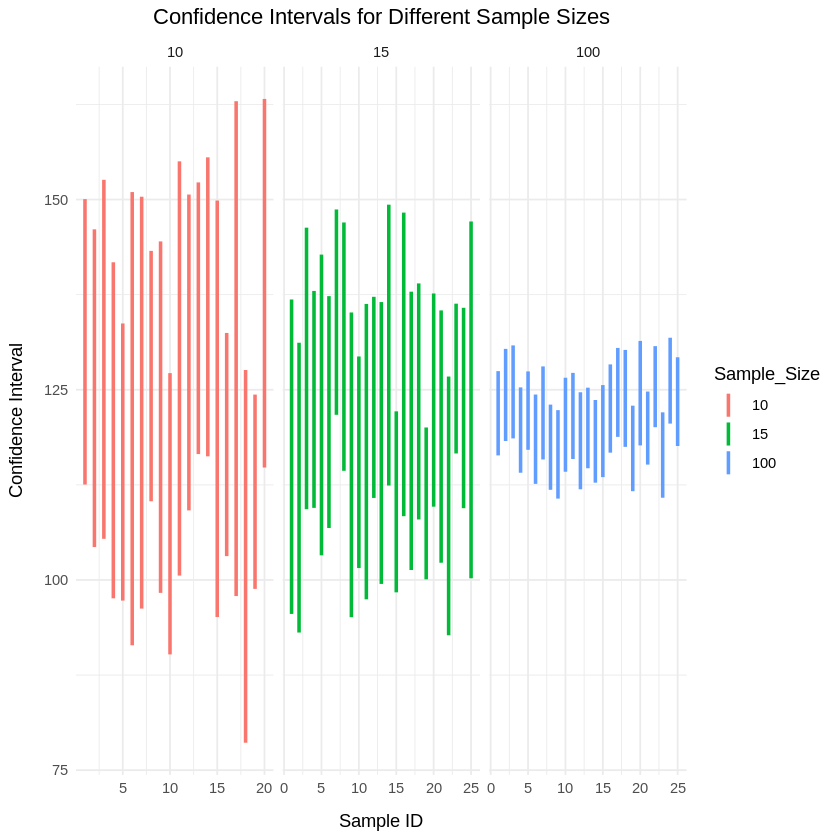

In [232]:
cis_1 <- apply(samples_1, 2, compute_ci)
cis_2 <- apply(samples_2, 2, compute_ci_z)
cis_3 <- apply(samples_3, 2, compute_ci)

cis_data <- data.frame(
  Sample_Size = factor(rep(c(15, 100, 10), times = c(25, 25, 20))),
  Lower_Bound = c(cis_1[1,], cis_2[1,], cis_3[1,]),
  Upper_Bound = c(cis_1[2,], cis_2[2,], cis_3[2,]),
  Sample_ID = unlist(lapply(c(25, 25, 20), seq_len))
)

ggplot(cis_data, aes(x = Sample_ID, ymin = Lower_Bound, ymax = Upper_Bound, color = Sample_Size)) +
  geom_linerange(size = 1) +
  facet_wrap(~ Sample_Size, scales = "free_x") +
  labs(
    title = "Confidence Intervals for Different Sample Sizes",
    x = "Sample ID",
    y = "Confidence Interval"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.title.x = element_text(margin = margin(t = 10)),
    axis.title.y = element_text(margin = margin(r = 10))
  )


## Proportion of CIs Containing the Population Mean:
- **Sample Size 15**: 0.92
- **Sample Size 100**: 0.96
- **Sample Size 10**: 0.85

### Interpretation:
- With a sample size of 100, the proportion of confidence intervals containing the true population mean is the highest (0.96), indicating greater accuracy.
- The proportion is slightly lower for a sample size of 15 (0.92), but still relatively high.
- The sample size of 10 shows the lowest proportion (0.85), demonstrating that smaller samples lead to less reliable estimates of the population mean.
